<a href="https://colab.research.google.com/github/ralsouza/data_visualisation_matplotlib_seaborn_ggplot/blob/master/notebooks/01_python_matplotlib_with_customized_modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Setting work directory and check directory
%cd '/content/drive/My Drive/Colab Notebooks/05_data_visualisation_matplotlib_seaborn_ggplot'

/content/drive/My Drive/Colab Notebooks/05_data_visualisation_matplotlib_seaborn_ggplot


In [0]:
import sys
import pandas as pd
import matplotlib as mpl
%matplotlib inline

In [0]:
# Appending the lib directory in this notebook
sys.path.append('/content/drive/My Drive/Colab Notebooks/05_data_visualisation_matplotlib_seaborn_ggplot/lib')

In [0]:
# Add customized libraries
import geradados, geraplot, radar

In [31]:
# Calling a customized function from geradados module
data = geradados.get_raw_data()
data.head()

,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,length,width,height,weight,engine type,cylinders,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [33]:
# Loading some data only
data_subset = geradados.get_limited_data()
data_subset.head()

,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
0,audi,13950,24,30,102,2337,2,164
1,audi,17450,18,22,115,2824,2,164
2,audi,17710,19,25,110,2844,1,158
3,audi,23875,17,20,140,3086,1,158
4,bmw,16430,23,29,101,2395,2,192


In [34]:
# Get all makes
geradados.get_all_auto_makes()

array(['audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'jaguar', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'peugot', 'plymouth',
       'porsche', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [35]:
# Get make counts, this function returns a tuple
(fab,total) = geradados.get_make_counts(data_subset)
total

[('audi', 4),
 ('bmw', 4),
 ('chevrolet', 3),
 ('dodge', 8),
 ('honda', 13),
 ('jaguar', 1),
 ('mazda', 11),
 ('mercedes-benz', 5),
 ('mitsubishi', 10),
 ('nissan', 18),
 ('peugot', 7),
 ('plymouth', 6),
 ('porsche', 1),
 ('saab', 6),
 ('subaru', 12),
 ('toyota', 31),
 ('volkswagen', 8),
 ('volvo', 11)]

In [36]:
fab

['audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [37]:
data = geradados.get_limited_data(lower_bound=6);data

,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
11,dodge,5572,37,41,68,1876,1,118
12,dodge,6377,31,38,68,1876,1,118
13,dodge,7957,24,30,102,2128,1,118
14,dodge,6229,31,38,68,1967,1,148
15,dodge,6692,31,38,68,1989,1,148
...,...,...,...,...,...,...,...,...
154,volvo,16845,23,28,114,2952,-1,95
155,volvo,19045,19,25,160,3049,-1,95
156,volvo,21485,18,23,134,3012,-1,95
157,volvo,22470,26,27,106,3217,-1,95


In [38]:
len(data.index)

141

# Normalizing Data
In statistics and applications of statistics, normalization can have a range of meanings. In the simplest cases, normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging.

In [0]:
# Is a good practice to copy our data
norm_data = data.copy()

In [0]:
# Change the column names from horsepower to power
norm_data.rename(columns={'horsepower':'power'}, inplace=True)

In [41]:
norm_data.head()

,make,price,city mpg,highway mpg,power,weight,riskiness,losses
11,dodge,5572,37,41,68,1876,1,118
12,dodge,6377,31,38,68,1876,1,118
13,dodge,7957,24,30,102,2128,1,118
14,dodge,6229,31,38,68,1967,1,148
15,dodge,6692,31,38,68,1989,1,148


## Normalizing data to columns with higher values

In [0]:
# Normalize the numeric columns with our customized module, to higher values (inverted=False)
geradados.norm_column(['city mpg','highway mpg','power'], norm_data, inverted=False)

In [43]:
# Check the normalized data
norm_data.head()

,make,price,city mpg,highway mpg,power,weight,riskiness,losses
11,dodge,5572,0.62500,0.59375,0.108108,1876,1,118
12,dodge,6377,0.43750,0.50000,0.108108,1876,1,118
13,dodge,7957,0.21875,0.25000,0.337838,2128,1,118
14,dodge,6229,0.43750,0.50000,0.108108,1967,1,148
15,dodge,6692,0.43750,0.50000,0.108108,1989,1,148


## Normalizing data to columns with lower values

In [0]:
# Normalize the numeric columns with our customized module, to lower values (inverted=True)
geradados.invert_norm_columns(['price','weight','riskiness','losses'],norm_data)

In [45]:
# Check the normalized data
norm_data.head()

,make,price,city mpg,highway mpg,power,weight,riskiness,losses
11,dodge,0.974068,0.62500,0.59375,0.108108,0.897031,0.4,0.722513
12,dodge,0.928086,0.43750,0.50000,0.108108,0.897031,0.4,0.722513
13,dodge,0.837836,0.21875,0.25000,0.337838,0.737840,0.4,0.722513
14,dodge,0.936540,0.43750,0.50000,0.108108,0.839545,0.4,0.565445
15,dodge,0.910093,0.43750,0.50000,0.108108,0.825648,0.4,0.565445


# Plots

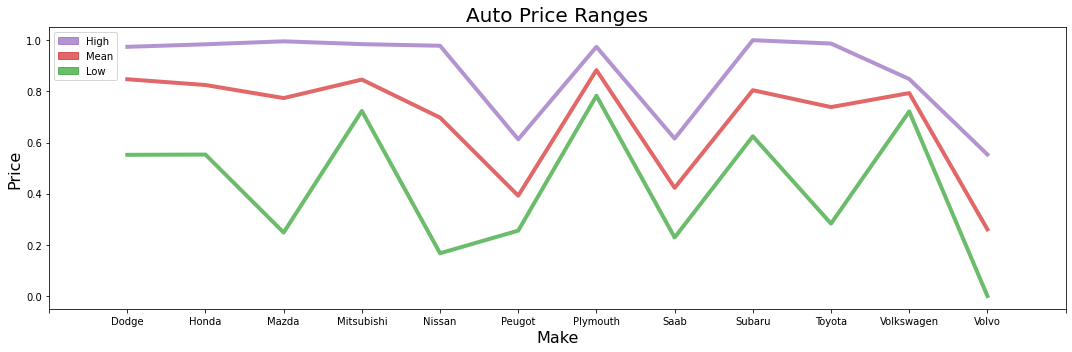

In [46]:
figure = plt.figure(figsize = (15, 5))
prices_gs = mpl.gridspec.GridSpec(1, 1)
prices_axes = geraplot.make_autos_price_plot(figure, prices_gs, norm_data)
plt.show()

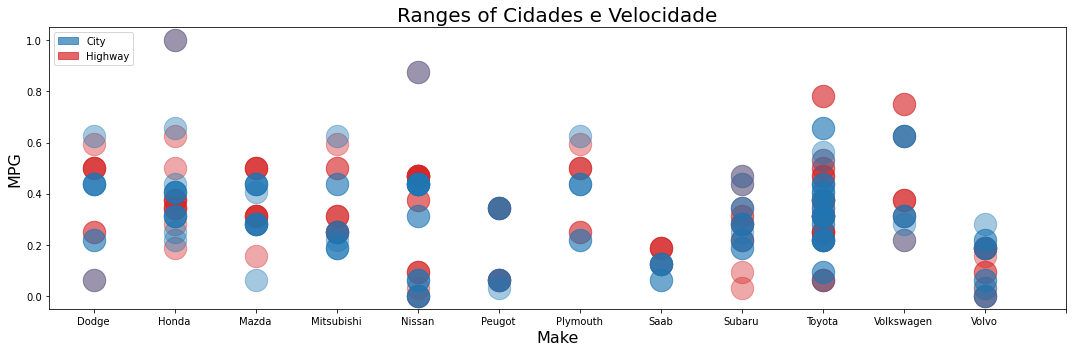

In [0]:
figure = plt.figure(figsize = (15, 5))
mpg_gs = mpl.gridspec.GridSpec(1, 1)
mpg_axes = geraplot.make_autos_mpg_plot(figure, mpg_gs, norm_data)
plt.show()

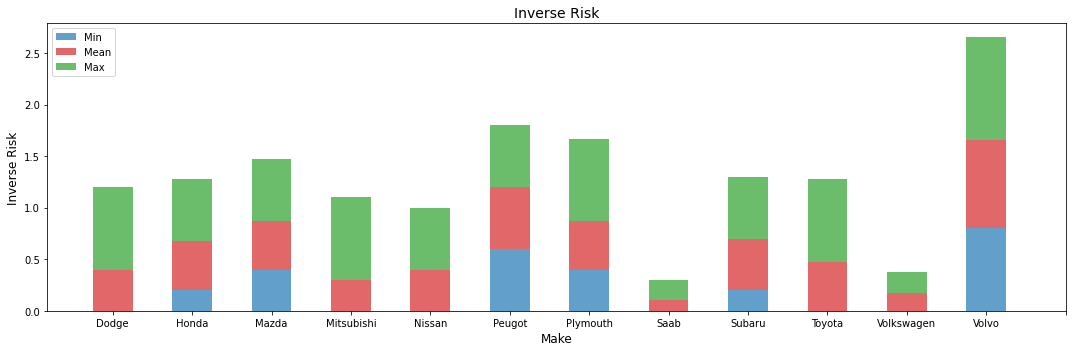

In [0]:
figure = plt.figure(figsize = (15, 5))
risk_gs = mpl.gridspec.GridSpec(1, 1)
risk_axes = geraplot.make_autos_riskiness_plot(figure, risk_gs, norm_data)
plt.show()

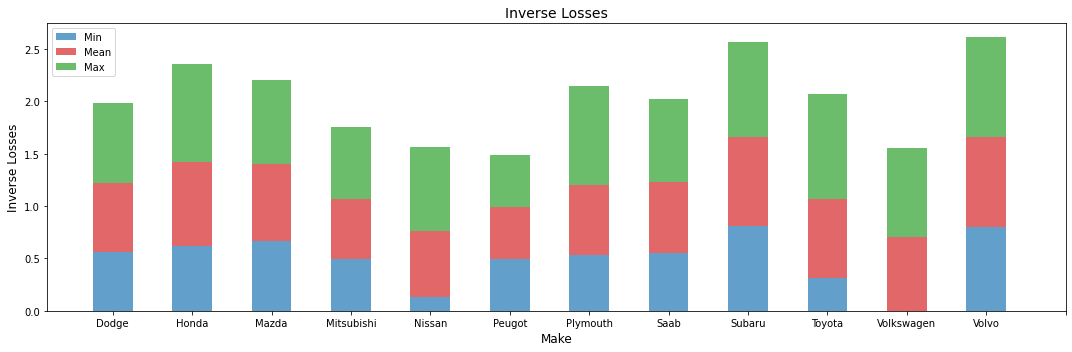

In [0]:
figure = plt.figure(figsize=(15, 5))
loss_gs = mpl.gridspec.GridSpec(1, 1)
loss_axes = geraplot.make_autos_losses_plot(figure, loss_gs, norm_data)
plt.show()

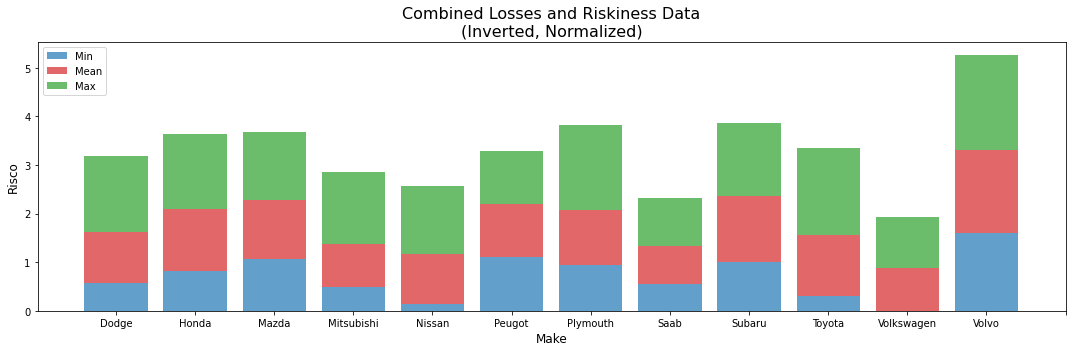

In [0]:
figure = plt.figure(figsize = (15, 5))
risk_loss_gs = mpl.gridspec.GridSpec(1, 1)
risk_loss_axes = geraplot.make_autos_loss_and_risk_plot(figure, risk_loss_gs, norm_data)
plt.show()

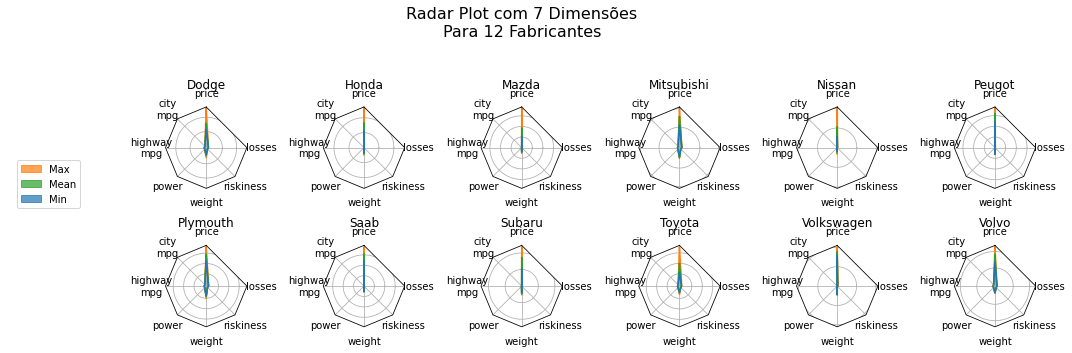

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
import warnings
#warnings.filterwarnings('ignore')
import matplotlib
%matplotlib inline
import sys
sys.path.append("lib")
import geradados, geraplot, radar
#plt.style.use("estilos/personalestilo-1.mplstyle")

data = geradados.get_raw_data()
data.head()
data = geradados.get_limited_data()
data.head()
data = geradados.get_limited_data(lower_bound = 6)
data.head()
norm_data = data.copy()
norm_data.rename(columns = {"horsepower": "power"}, inplace = True)
figure = plt.figure(figsize = (15, 5))

radar_gs = mpl.gridspec.GridSpec(3, 7, 
                                 height_ratios = [1, 10, 10], 
                                 wspace = 0.50, 
                                 hspace = 0.60, 
                                 top = 0.95, 
                                 bottom = 0.25)
radar_axes = geraplot.make_autos_radar_plot(figure, gs=radar_gs, pddata=norm_data)
plt.show()

# Combined Plot
Wireframe

```
--------------------------------------------
|               overall title              |
--------------------------------------------
|               price ranges               |
--------------------------------------------
| combined loss/risk |                     |
|                    |        radar        |
----------------------        plots        |
|  risk   |   loss   |                     |
--------------------------------------------
|                   mpg                    |
--------------------------------------------
```



In [0]:
import matplotlib.pyplot as plt

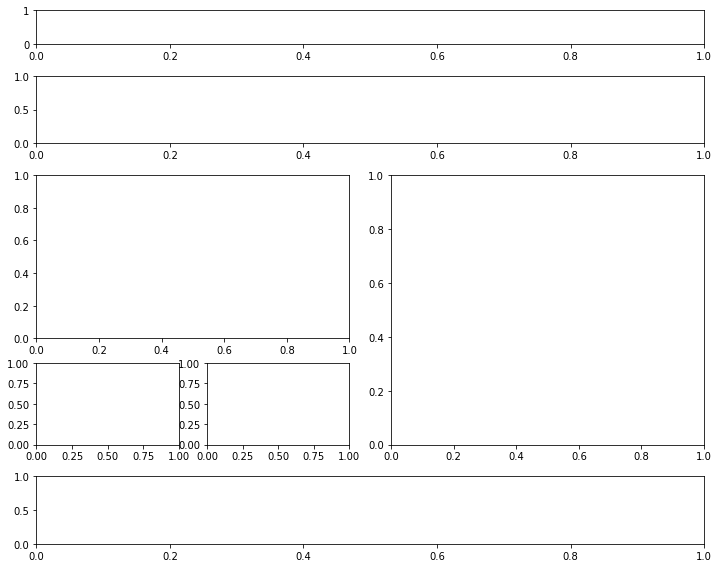

In [15]:
# Making layers (without data)
figure = plt.figure(figsize=(10, 8))
gs_master = mpl.gridspec.GridSpec(4, 2, height_ratios=[1, 2, 8, 2])

# Layer 1 - Title
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[0, :])
title_axes = figure.add_subplot(gs_1[0])

# Layer 2 - Price
gs_2 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[1, :])
price_axes = figure.add_subplot(gs_2[0])

# Layer 3 - Risks & Radar
gs_31 = mpl.gridspec.GridSpecFromSubplotSpec(2, 2, height_ratios=[2, 1], subplot_spec=gs_master[2, :1])
risk_and_loss_axes = figure.add_subplot(gs_31[0, :])
risk_axes = figure.add_subplot(gs_31[1, :1])
loss_axes = figure.add_subplot(gs_31[1:, 1])
gs_32 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[2, 1])
radar_axes = figure.add_subplot(gs_32[0])

# Layer 4 - MPG
gs_4 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[3, :])
mpg_axes = figure.add_subplot(gs_4[0])

# Join layers, without data yet
gs_master.tight_layout(figure)
plt.show()

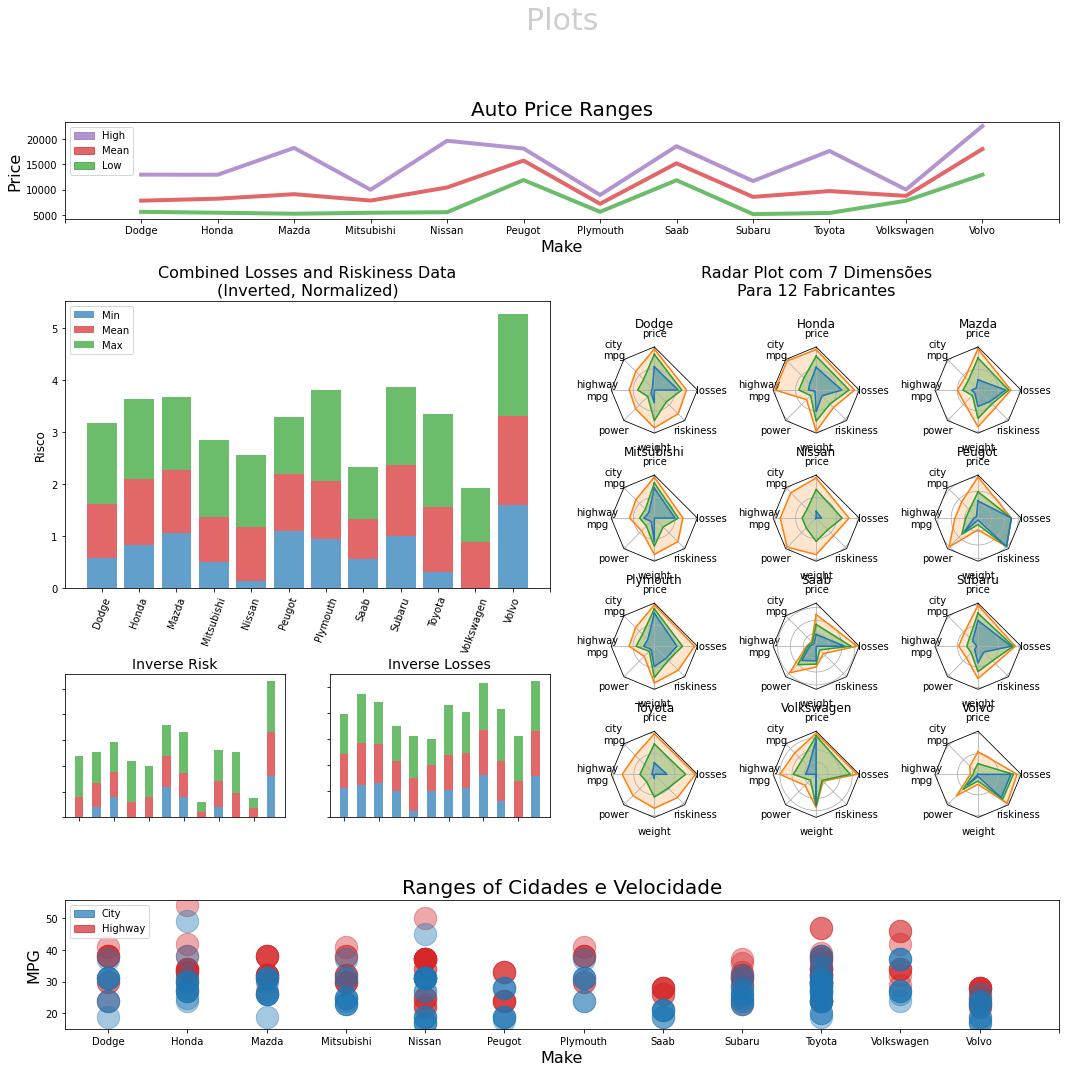

In [48]:
# Making layers (with data)
figure = plt.figure(figsize = (15, 15))
gs_master = mpl.gridspec.GridSpec(4, 2, 
                                  height_ratios = [1, 24, 128, 32], 
                                  hspace = 0, 
                                  wspace = 0)

# Layer 1 - Title
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs_master[0, :])
title_axes = figure.add_subplot(gs_1[0])
title_axes.set_title("Plots", fontsize = 30, color = "#cdced1")
geraplot.hide_axes(title_axes)

# Layer 2 - Price
gs_2 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs_master[1, :])
price_axes = figure.add_subplot(gs_2[0])
geraplot.make_autos_price_plot(figure, 
                               pddata = data, 
                               axes = price_axes)

# Layer 3, Part I - Risks
gs_31 = mpl.gridspec.GridSpecFromSubplotSpec(2, 2, 
                                             height_ratios = [2, 1], 
                                             hspace = 0.4, 
                                             subplot_spec = gs_master[2, :1])
risk_and_loss_axes = figure.add_subplot(gs_31[0, :])
geraplot.make_autos_loss_and_risk_plot(figure, 
                                       pddata = norm_data, 
                                       axes = risk_and_loss_axes, 
                                       x_label = False, 
                                       rotate_ticks = True)
risk_axes = figure.add_subplot(gs_31[1, :1])
geraplot.make_autos_riskiness_plot(figure, 
                                   pddata = norm_data, 
                                   axes = risk_axes, 
                                   legend = False, 
                                   labels = False)
loss_axes = figure.add_subplot(gs_31[1:, 1])
geraplot.make_autos_losses_plot(figure, 
                                pddata = norm_data, 
                                axes = loss_axes, 
                                legend = False, 
                                labels = False)

# Layer 3, Part II - Radar
gs_32 = mpl.gridspec.GridSpecFromSubplotSpec(5, 3, 
                                             height_ratios = [1, 20, 20, 20, 20], 
                                             hspace = 0.6, 
                                             wspace = 0, 
                                             subplot_spec = gs_master[2, 1])
(rows, cols) = geometry = gs_32.get_geometry()
title_axes = figure.add_subplot(gs_32[0, :])
inner_axes = []
projection = radar.RadarAxes(spoke_count = len(norm_data.groupby("make").mean().columns))
[inner_axes.append(figure.add_subplot(m, projection = projection)) for m in [n for n in gs_32][cols:]]
geraplot.make_autos_radar_plot(figure, 
                               pddata = norm_data, 
                               title_axes = title_axes, 
                               inner_axes = inner_axes, 
                               legend_axes = False, 
                               geometry = geometry)

# Layer 4 - MPG
gs_4 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs_master[3, :])
mpg_axes = figure.add_subplot(gs_4[0])
geraplot.make_autos_mpg_plot(figure, 
                             pddata = data, 
                             axes = mpg_axes)

# Joining layers
gs_master.tight_layout(figure)
plt.show()